In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# membaca data
df = pd.read_excel('covid19-olah.xlsx')
df.head()

,Aktif,Meninggal,Sembuh
0,NaN,NaN,NaN
1,NaN,NaN,2.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [3]:
# mencari tahu dimensi data
df.shape

(61, 3)

In [4]:
df.columns.values

array(['Aktif', 'Meninggal', 'Sembuh'], dtype=object)

# Analisis Deskriptif

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
Aktif        54 non-null float64
Meninggal    47 non-null float64
Sembuh       48 non-null float64
dtypes: float64(3)
memory usage: 1.5 KB


In [6]:
"""
Pembahasan:
data yang didapat memiliki tipe float semua dan terdapat beberapa field yang berisi nilai NaN. NaN bisa diisi
dengan 0 atau nilai rerata atau jika data tersebut kategorikal dapat diisi dengan modus
"""

'\nPembahasan:\ndata yang didapat memiliki tipe float semua dan terdapat beberapa field yang berisi nilai NaN. NaN bisa diisi\ndengan 0 atau nilai rerata atau jika data tersebut kategorikal dapat diisi dengan modus\n'

In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Aktif,54.0,144.555556,102.610578,1.0,65.75,114.5,224.75,352.0
Meninggal,47.0,16.829787,13.133626,1.0,8.00,12.0,22.50,60.0
Sembuh,48.0,31.687500,35.420367,1.0,4.00,19.0,46.25,144.0


In [8]:
"""
Pembahasan:
Terlihat nilai rata-rata lebih besar dari pada nilai mediannya. sehingga distribusi data menjadi tidak normal.
kecenderungan kurvanya akan melenceng ke kanan (skewed negatif)
"""

'\nPembahasan:\nTerlihat nilai rata-rata lebih besar dari pada nilai mediannya. sehingga distribusi data menjadi tidak normal.\nkecenderungan kurvanya akan melenceng ke kanan (skewed negatif)\n'

In [9]:
# Mengganti nilai NaN dengan 0. dengan asusmsi bahwa tidak ada kasus pada saat itu
df = df.replace(np.nan, 0)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


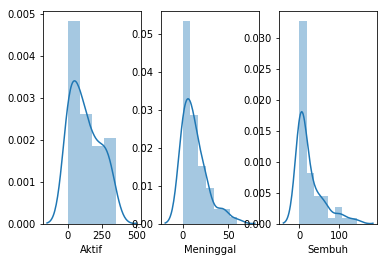

In [10]:
l = df.columns.values
number_of_columns=3
number_of_rows = len(l)-1/number_of_columns

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

In [11]:
"""
Data tidak terdistribusi dengan normal (skewed to left). hal ini akan sulit jika dilakukan analisis regresi
"""

'\nData tidak terdistribusi dengan normal (skewed to left). hal ini akan sulit jika dilakukan analisis regresi\n'

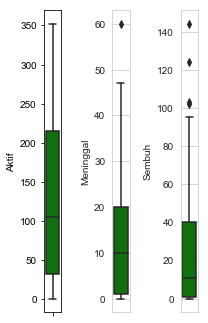

In [12]:
# untuk mengetahui ada atau tidaknya anomali data
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

In [13]:
"""
selain variabel "aktif" terdapat anomali data.
"""

'\nselain variabel "aktif" terdapat anomali data.\n'

# Analisis Korelasi
Analisis korelasi menjelaskan ada atau tidaknya hubungan antar dua variabel. Nilai Korelasi bisa positif atau negatif atau lemah. Korelasi positif yang artinya jika penambahan pada nilai X maka bertambah juga nilai Y. Korelasi negatif menjelaskan hubungan setiap kenaikan nilai X maka ada penurunan pada nilai Y. Korelasi yang lemah menjelaskan dua variabel ini tidak ada hubungannya sama sekali. Biasanya korelasi dikatakan sangat kuat jika nilainya melebihi 0.7 jika kurang dari tersebut korelasi antar dua variabel tersebut lemah.[1]

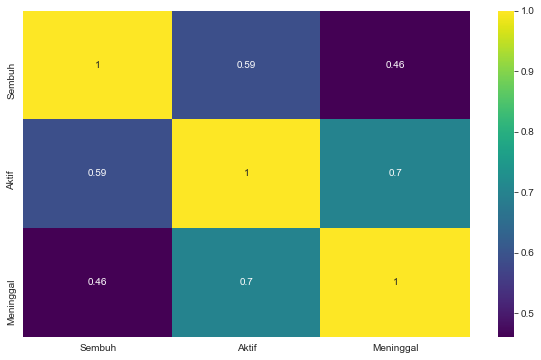

In [14]:
#Quality correlation matrix
k = 3 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Sembuh')['Sembuh'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [15]:
"""
Pembahasan
Terlihat dari diagram diatas, variabel-variabel yang ada tidak berkorelasi sangat kuat. Namun terdapat 2 variabel
yang menunjukkan korelasi cukup kuat yaitu variabel "aktif" dan "meninggal". jika akan dilakukan analisis regresi
dapat menggunakan variabel tersebut
"""

'\nPembahasan\nTerlihat dari diagram diatas, variabel-variabel yang ada tidak berkorelasi sangat kuat. Namun terdapat 2 variabel\nyang menunjukkan korelasi cukup kuat yaitu variabel "aktif" dan "meninggal". jika akan dilakukan analisis regresi\ndapat menggunakan variabel tersebut\n'

# Analisis Klaster
karena data yang diamati tidak memiliki label maka dilakukan analisis klaster untuk mengelompokkan data
berdasarkan tingkat similaritasnya.

In [16]:
X = df.iloc[:, [0, 1, 2]].values
X

array([[  0.,   0.,   0.],
       [  0.,   0.,   2.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  1.,   0.,   1.],
       [  0.,   0.,   0.],
       [  1.,   0.,   1.],
       [ 11.,   0.,   2.],
       [  7.,   1.,   0.],
       [  7.,   0.,   0.],
       [  0.,   0.,   0.],
       [ 32.,   3.,   0.],
       [ 27.,   0.,   0.],
       [ 21.,   0.,   0.],
       [ 14.,   1.,   2.],
       [ 38.,   0.,   0.],
       [ 38.,  14.,   3.],
       [ 71.,   7.,   4.],
       [ 51.,   7.,   2.],
       [ 73.,   5.,   3.],
       [ 45.,  10.,   9.],
       [ 64.,   1.,   1.],
       [100.,   6.,   0.],
       [100.,   3.,   1.],
       [ 79.,  20.,   4.],
       [133.,   9.,  11.],
       [ 81.,  15.,  13.],
       [113.,  12.,   5.],
       [110.,   8.,  11.],
       [ 94.,  14.,   6.],
       [106.,  21.,  22.],
       [ 92.,  12.,   9.],
       [163.,  12.,  21.],
       [ 80.,  10.,  16.],
       [160.,   7.,  14.],
       [179.,  11.,  28.],
 

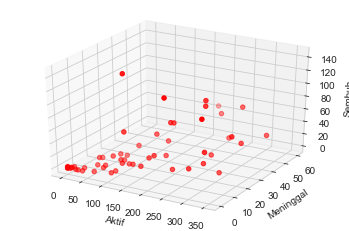

In [17]:
# data presentation: menggambarkan persebaran data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=X[:,0], ys=X[:,1], zs=X[:,2], c='r', marker='o')

ax.set_xlabel('Aktif')
ax.set_ylabel('Meninggal')
ax.set_zlabel('Sembuh')

plt.show()

# elbow method
digunakan untuk menentukan jumlah klaster terbaik dengan mempertimbangkan error pada jarak

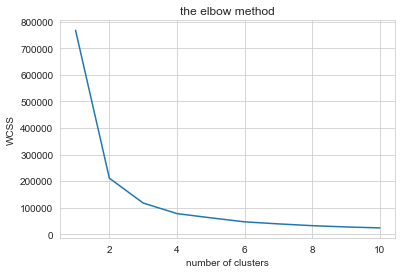

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
"""
klaster terbaik yanng dapat terbentuk berjumlah 3 klaster
"""

'\nklaster terbaik yanng dapat terbentuk berjumlah 3 klaster\n'

In [20]:
# Melakukan pemodelan dengan K-Means untuk 3 klaster
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [27]:
# Hasil klaster ke-2
df[kmeans.labels_==2].sort_values(by = ['Aktif', 'Meninggal', 'Sembuh'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,Aktif,Meninggal,Sembuh
60,215.0,8.0,124.0
37,224.0,11.0,12.0
49,225.0,47.0,55.0
46,251.0,27.0,102.0
51,254.0,26.0,95.0
45,267.0,10.0,20.0
39,267.0,40.0,30.0
43,269.0,26.0,21.0
42,280.0,46.0,73.0
48,286.0,15.0,24.0


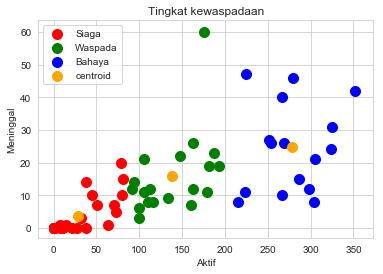

In [22]:
# visualisasi klaster yang dihasilkan dengan 2 dimensi (kasus aktif dan meninggal)
# memberikan label pada klaster

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Siaga')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Waspada')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Bahaya')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'centroid')
plt.title('Tingkat kewaspadaan')
plt.xlabel('Aktif')
plt.ylabel('Meninggal')
plt.legend()
plt.show()

In [23]:
# Analisis regresi
x = df.iloc[:, :1].values
y = df.iloc[:, 1].values

In [24]:
from sklearn.model_selection import train_test_split 
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)




2.165077996825435
[0.08829081]


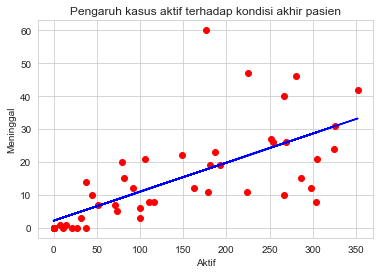

In [25]:
plt.scatter(X_train[:, 0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Pengaruh kasus aktif terhadap kondisi akhir pasien')
plt.xlabel('Aktif')
plt.ylabel('Meninggal')
plt.show()